<a href="https://colab.research.google.com/github/Edvard88/Test_works/blob/master/Yolo_waterius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Проект Waterius**

### **Бизнес-задача**
Задача проекта Waterius автоматическая отправка с счетчиков воды в управляющую компанию. 

Есть проблема, что не все счтечики электронные и не могут сами отправлять результаты. 

На устройстве Waterius есть камера, благодаря которой можно фотографировать данные счетчика, благодаря этому можно созать сервис распознования цифр, а следовательно в будущем автоматического отправления результатов. 

### **Техническая задача**
По фотографии распознавать все цифры, а также, \\
когда цифры меняются, те смена цифр с 0 на 1 \\ 
считать за отельный класс, смена цифры с 1 на 2 и тд...

Пример:

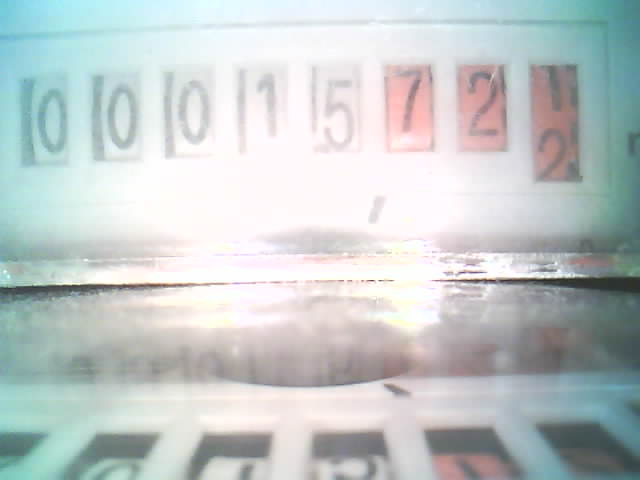


Выходные классы: \\
0 | 0 | 0 | 1 | 5 | 7 | 2 | 1,5

### **Реализация**
1) Для реализации было принято использовать модель YOLOv5\\ переобучить ее под текущую задачу.\\
Было принято использовать подходящую реализацию модели из\\ репозитория: https://github.com/ultralytics/yolov5 \\

2) Сбор данных производился автоматически, и размечался. \\
**описать метод сбора данных** \\

В качестве версионирования данных была использована система: RoboFlow

## Содержание ##
1. Обучение модели на собственных данных \\
  1.1. Клонирование репозитория \\
  1.2. Загрузка размеченных данные через сервис Roboflow \\
  1.3. Обучени модели \\
  1.4. Применение на валидационном датасете \\
  1.5. Загрузка полученных весов \\


2. Применение модели

In [ ]:
План:
1) Реализуем переобучение модели под собственные данные
2) Применение модели с помощью юпитер ноутбука

# **Обучение модели на собственных данных**

## 1. Клонирование репозитория

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 9771, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 9771 (delta 15), reused 17 (delta 7), pack-reused 9739
Receiving objects: 100% (9771/9771), 10.04 MiB | 22.10 MiB/s, done.
Resolving deltas: 100% (6790/6790), done.
/content/yolov5
     |████████████████████████████████| 636 kB 4.2 MB/s 
     |████████████████████████████████| 178 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 35.8 MB/s 
     |████████████████████████████████| 138 kB 53.3 MB/s 
     |████████████████████████████████| 62 kB 905 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompa

## 2. Загрузка размеченных данные через сервис Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="BwG6vLJ9nAyYobWbRfMg")
project = rf.workspace().project("waterius_auto")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Waterius_auto-1 in yolov5pytorch:: 100%|██████████| 1968/1968 [00:01<00:00, 996.20it/s] 


## 3. Обучени модели

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Waterius_auto-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-2-g26784af torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

In [ ]:
#   #export your model's weights for future use
# from google.colab import files
# files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. Применение на валидационном датасете

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Waterius_auto-1/test/images, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-2-g26784af torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7064065 parameters, 0 gradients, 16.0 GFLOPs
image 1/97 /content/datasets/Waterius_auto-1/test/images/0020_0_0_0_1_5_6_5_9_jpg.rf.1fbecc51be0ee41758f45e4bed7e22a6.jpg: 416x416 3 0s, 1 1, 2 5s, 1 6, 1 9, Done. (0.028s)
image 2/97 /content/datasets/Waterius_auto-1/test/images/0023_0_0_0_1_5_6_5-5_9-5_jpg.rf.89f0dfdeb72e4b59652296fa5d478d8a.jpg: 416x416 3 0s, 1 1, 2 10s, 2 14s, 1 15, 1 4, 1 5, 1 6, Done. (0.029s)
im

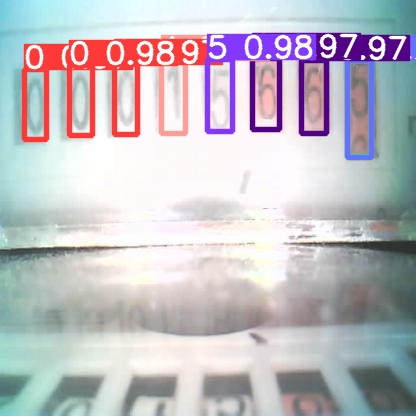

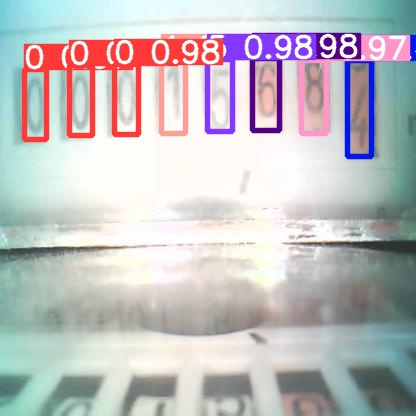

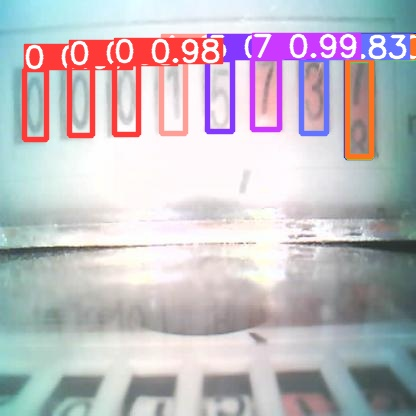

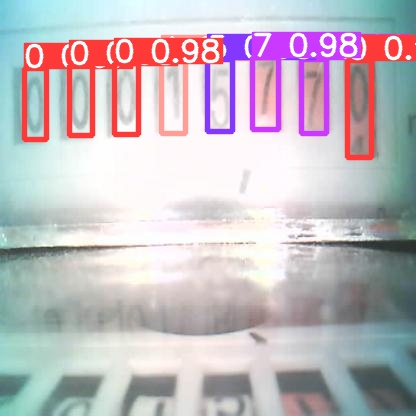

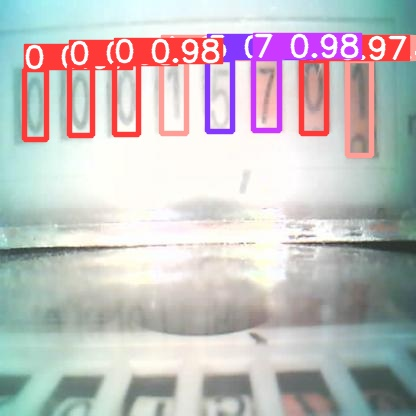

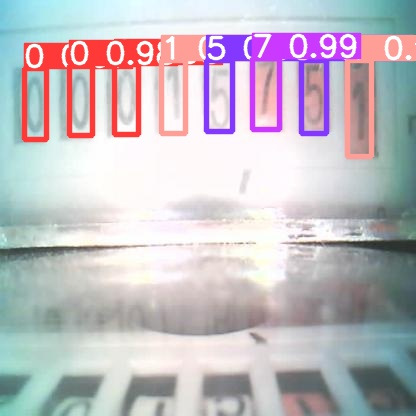

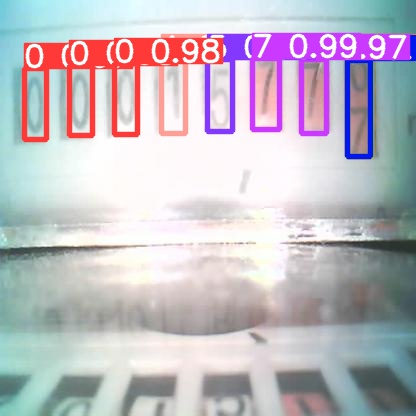

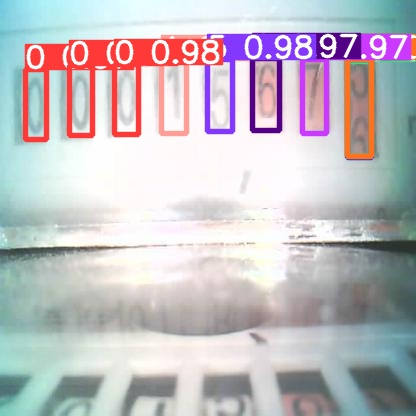

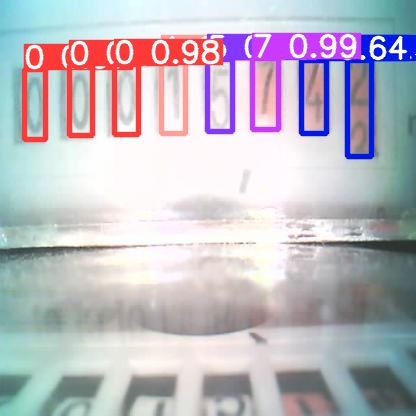

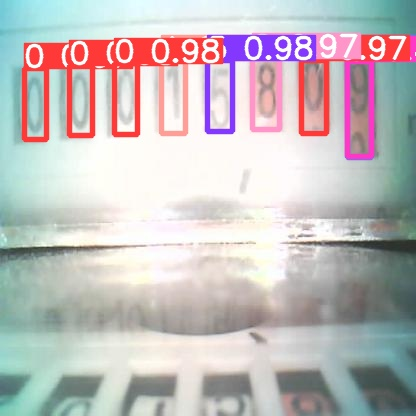

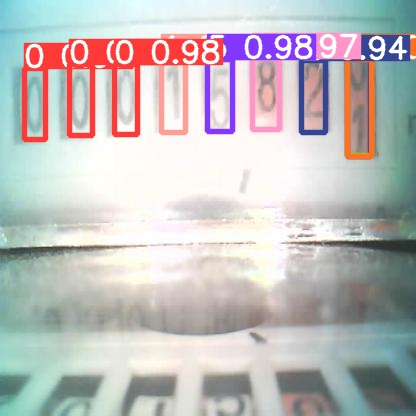

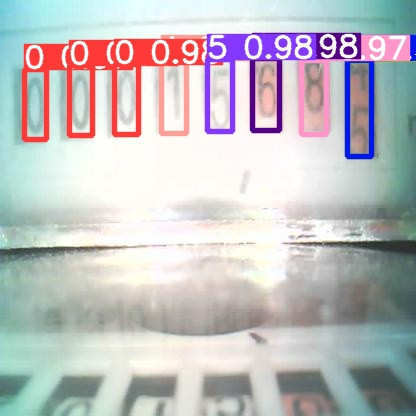

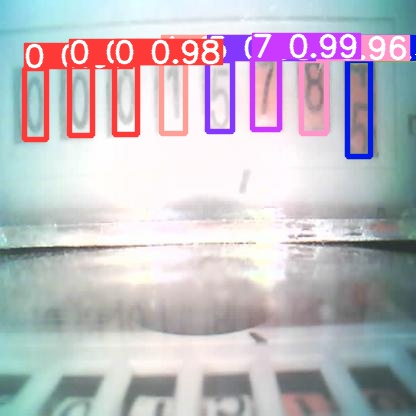

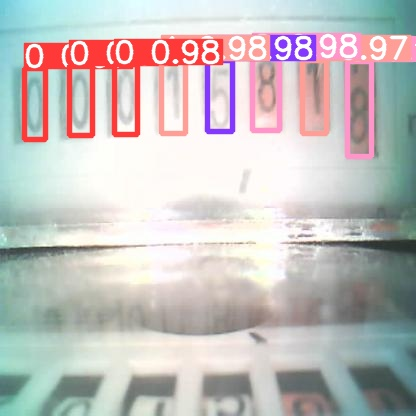

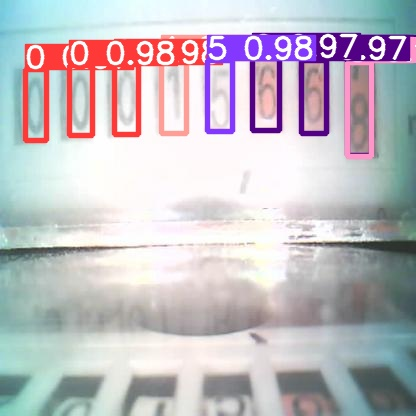

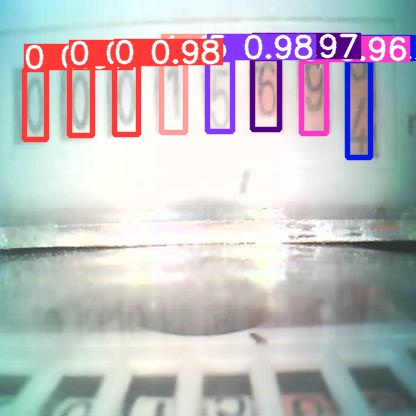

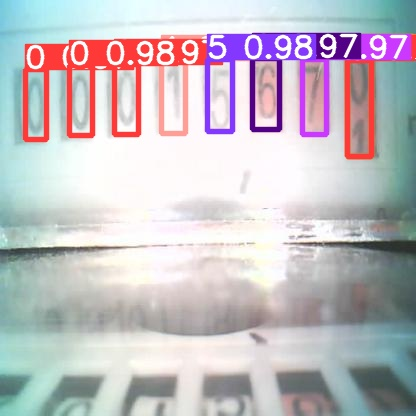

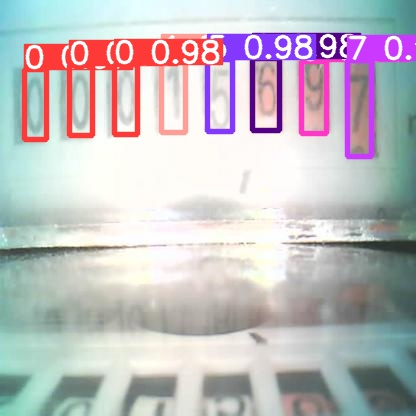

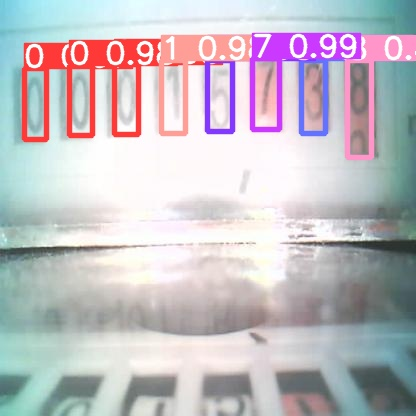

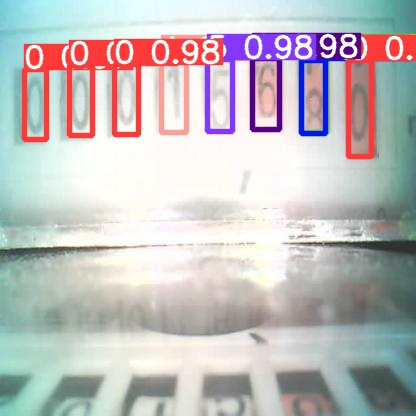

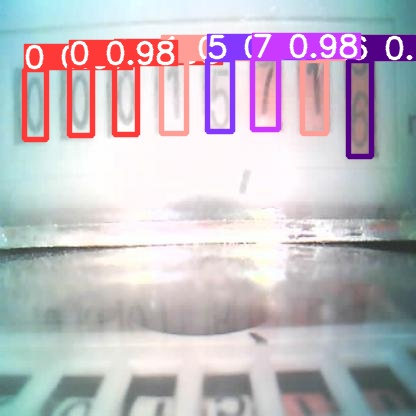

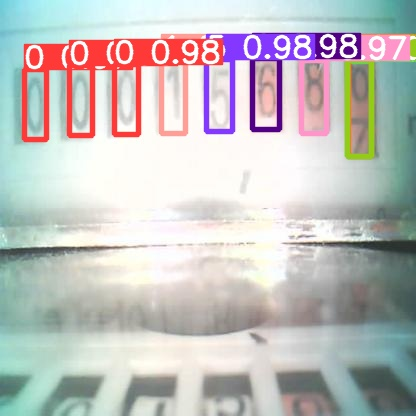

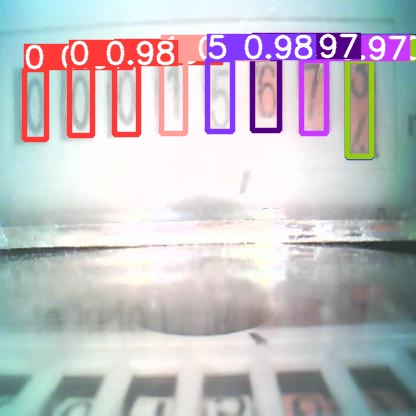

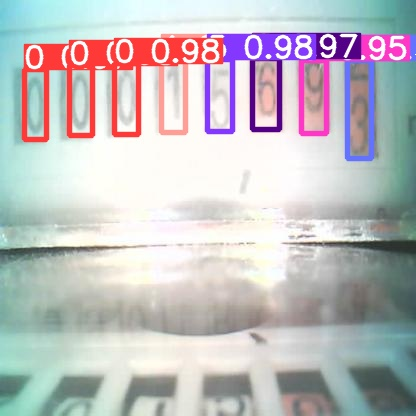

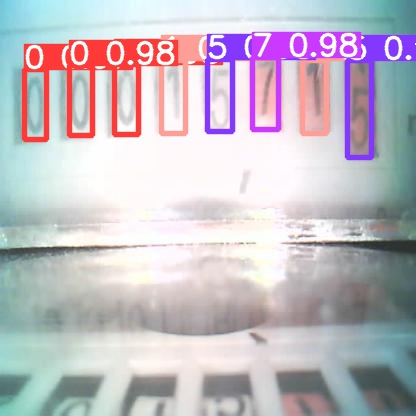

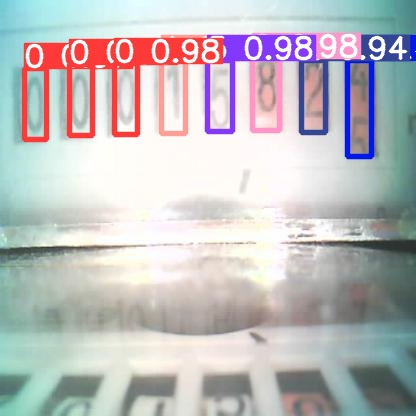

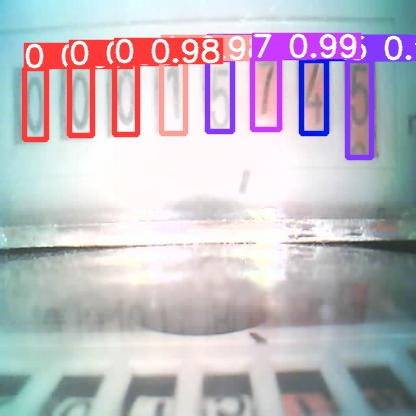

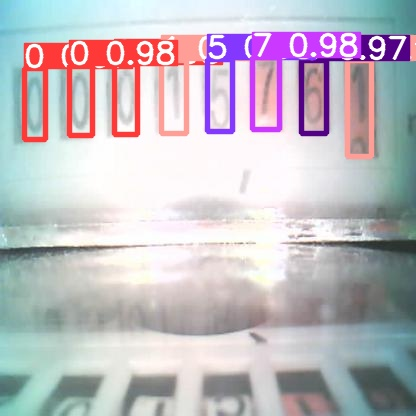

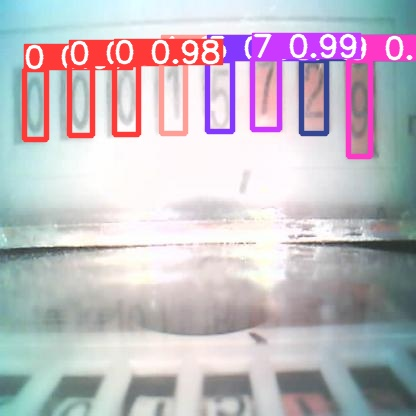

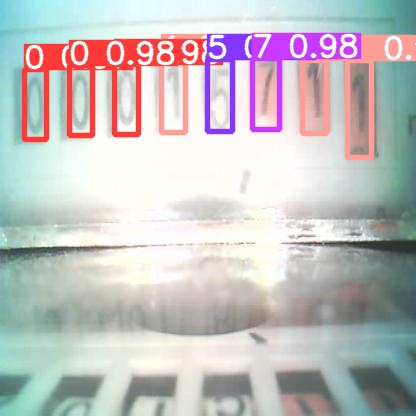

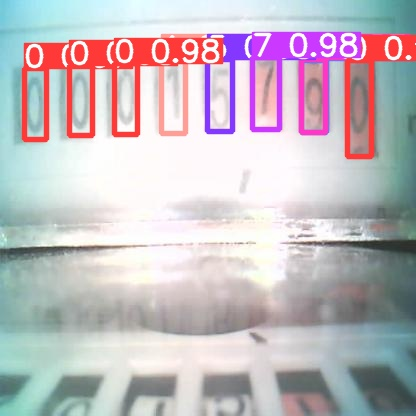

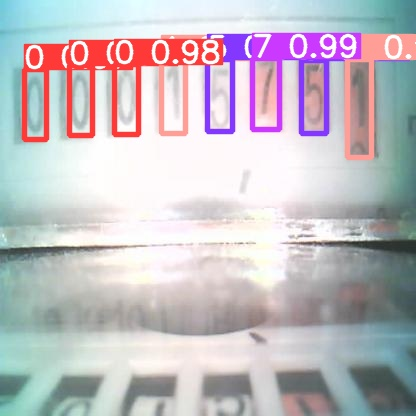

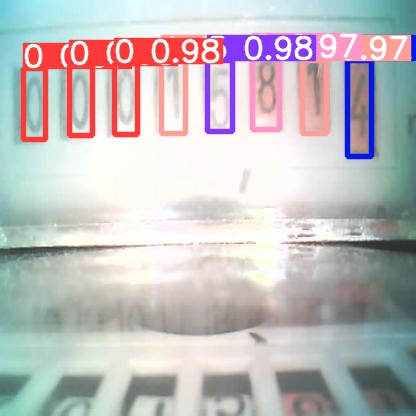

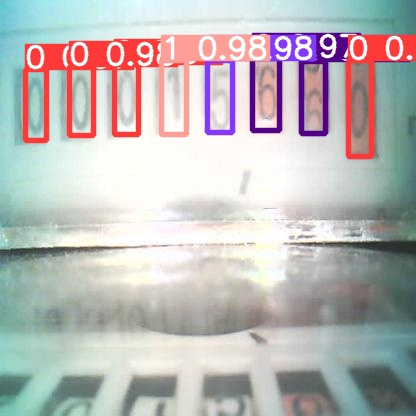

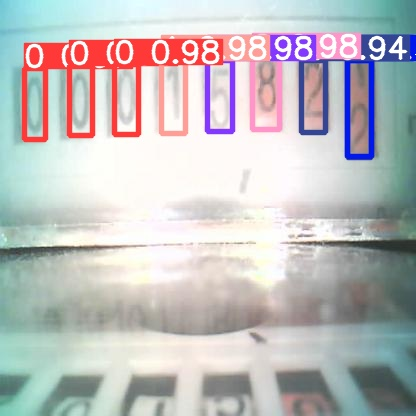

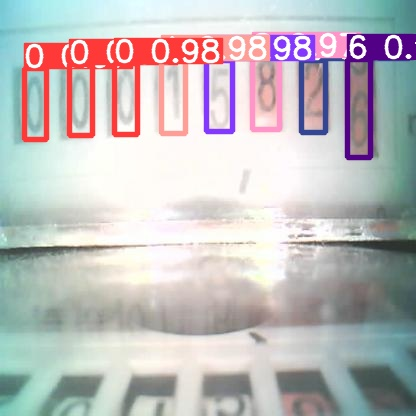

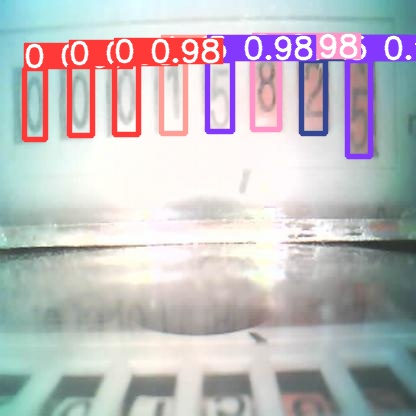

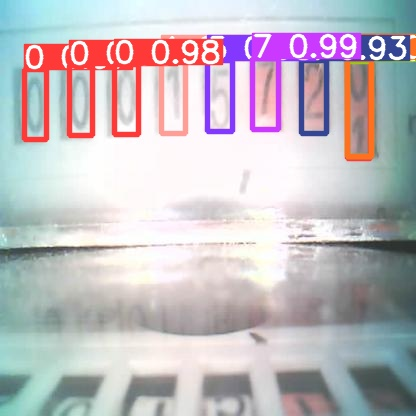

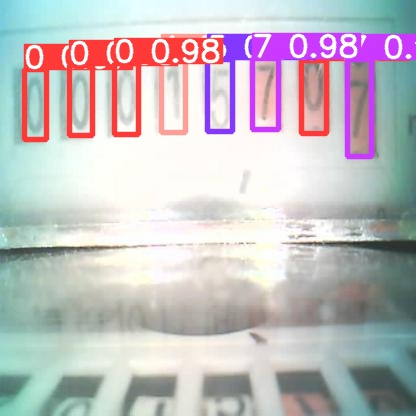

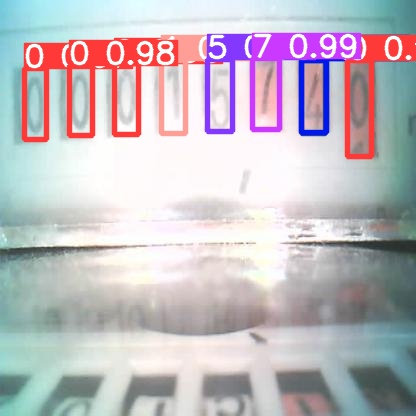

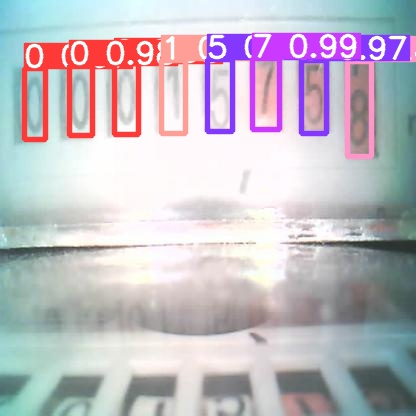

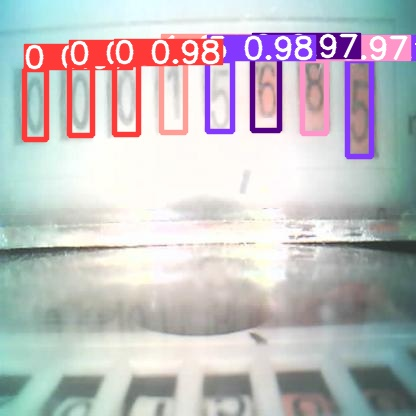

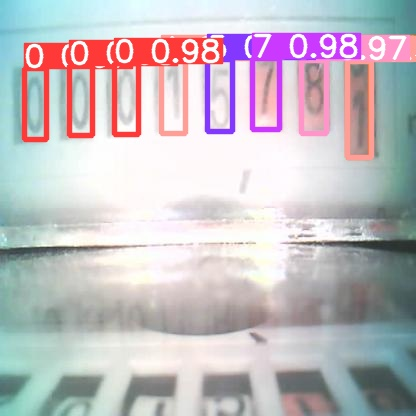

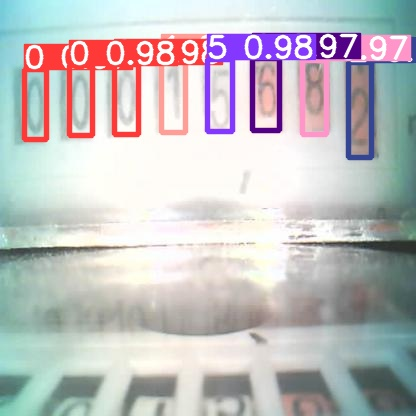

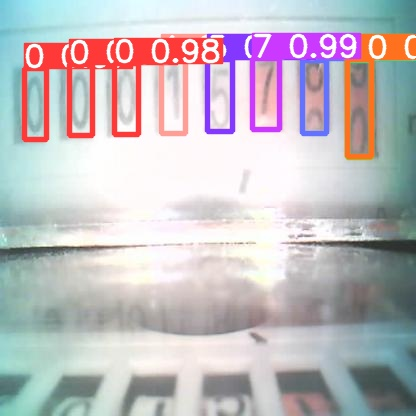

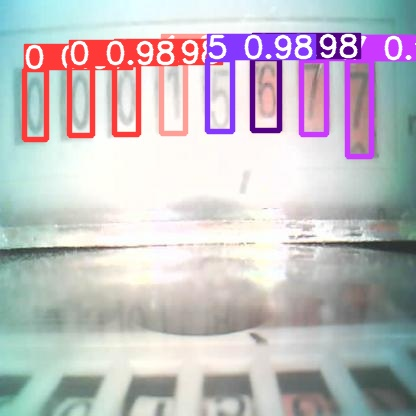

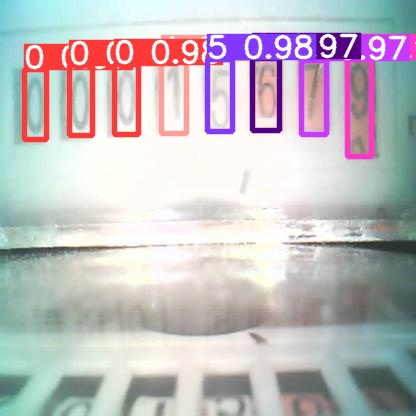

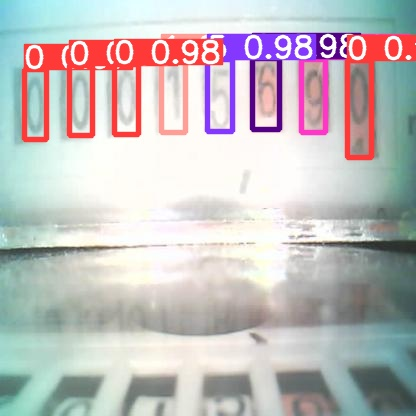

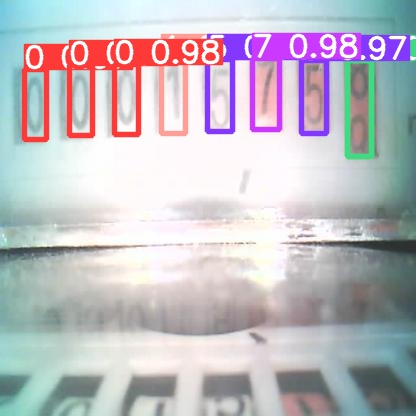

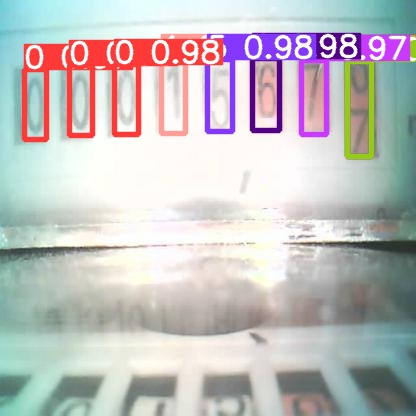

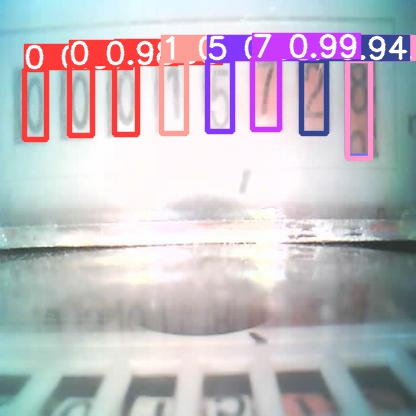

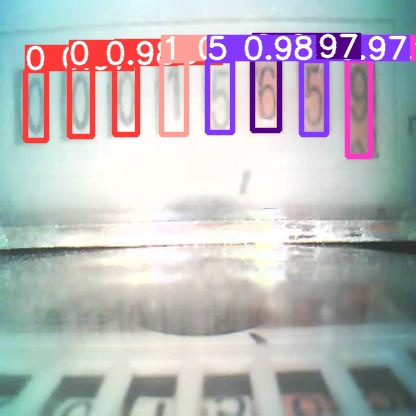

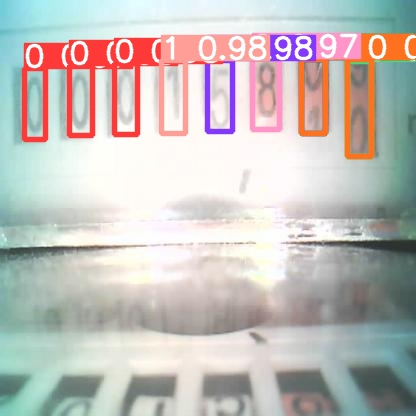

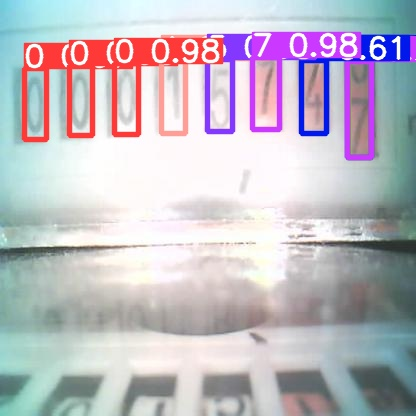

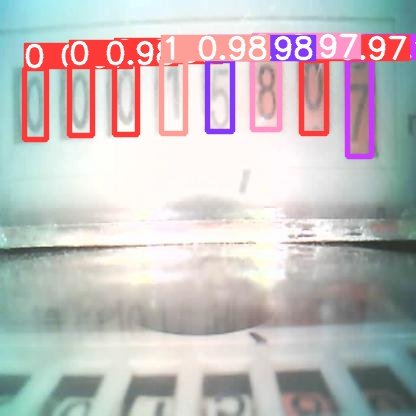

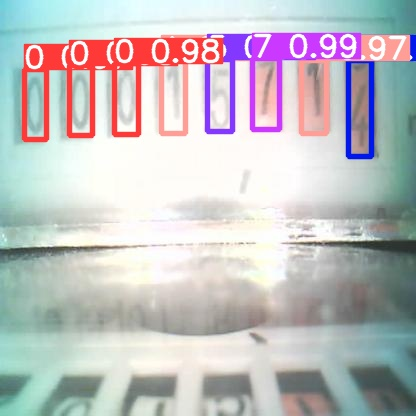

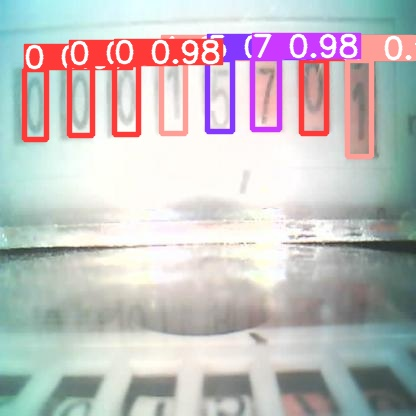

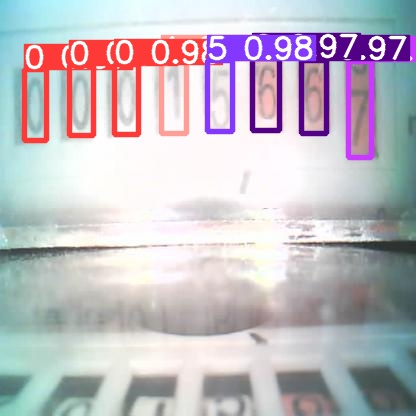

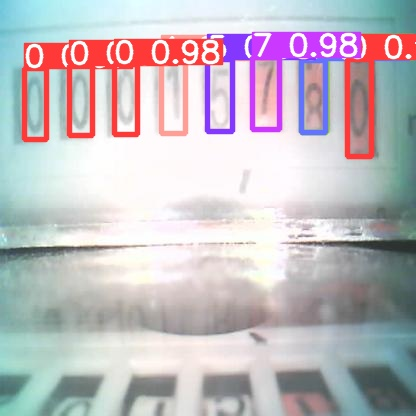

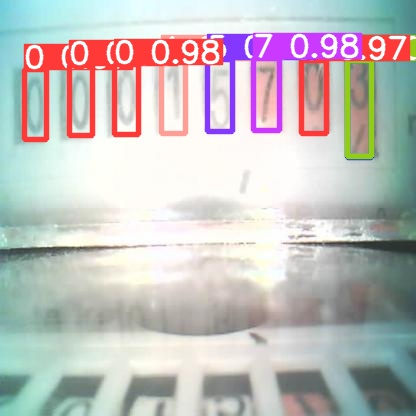

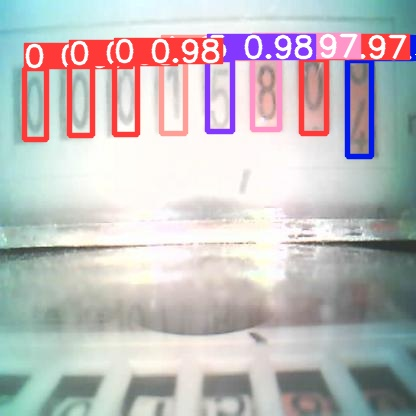

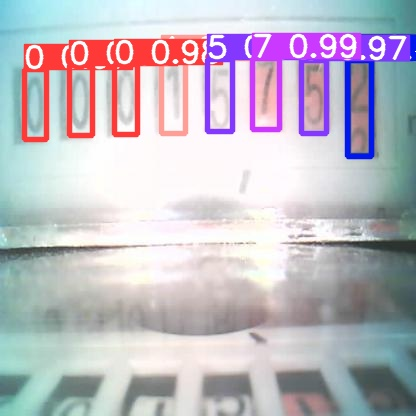

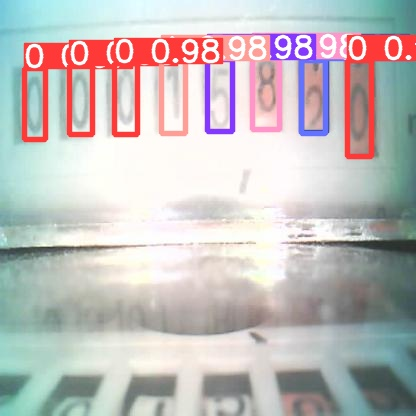

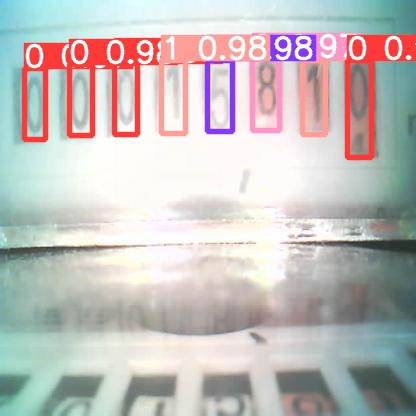

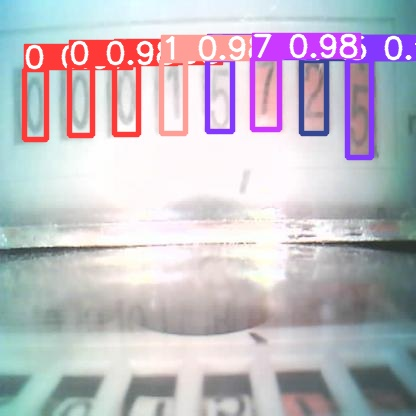

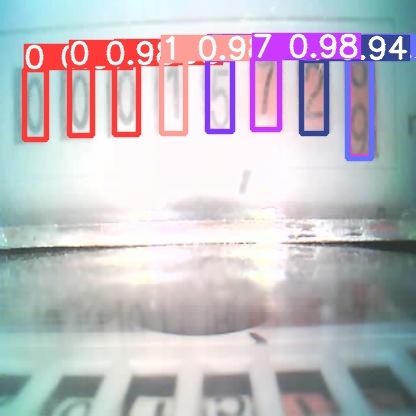

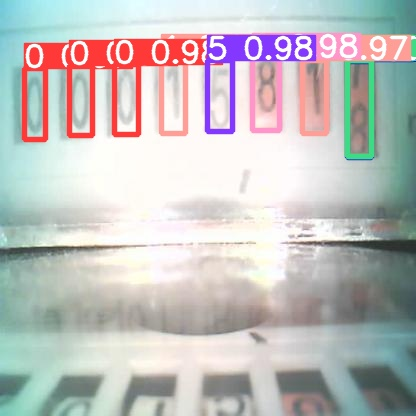

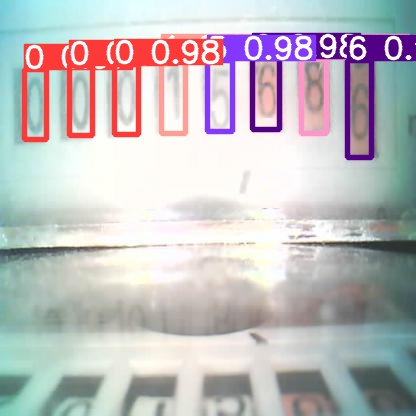

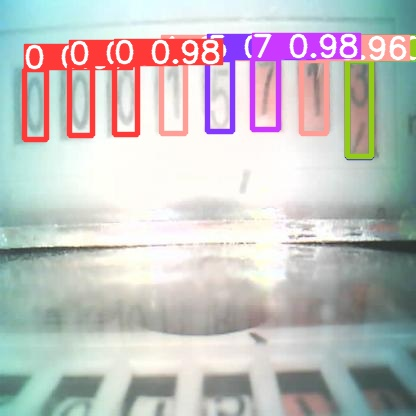

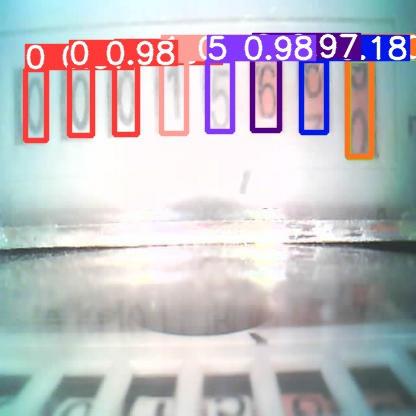

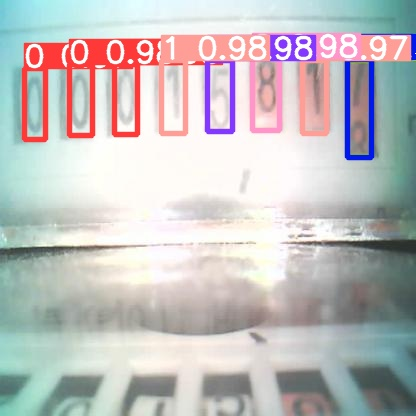

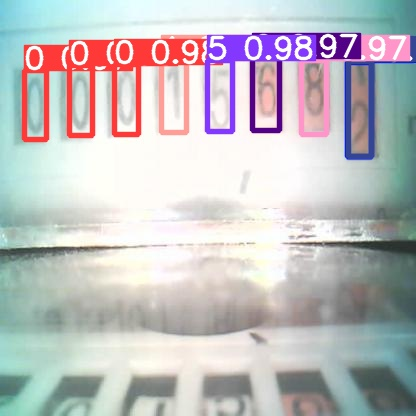

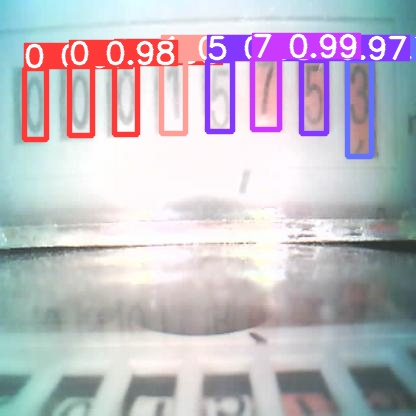

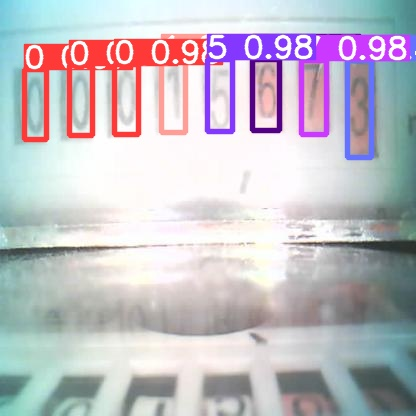

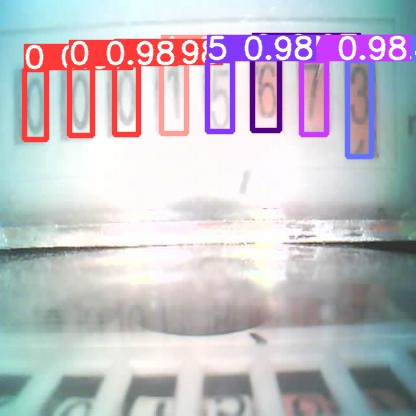

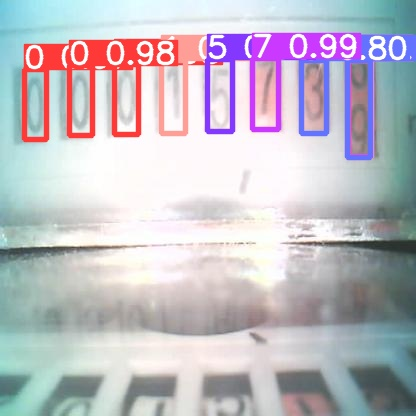

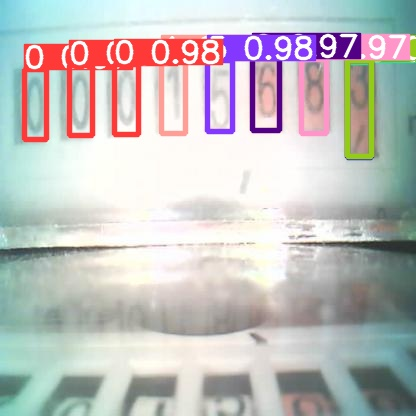

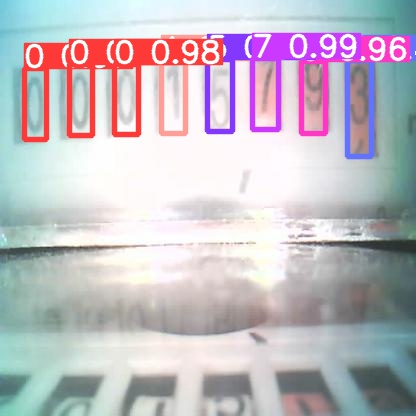

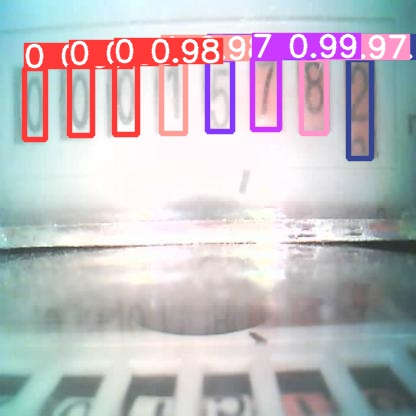

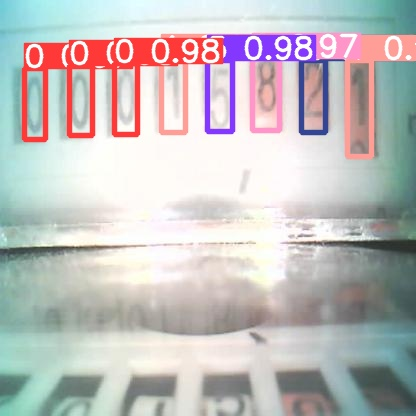

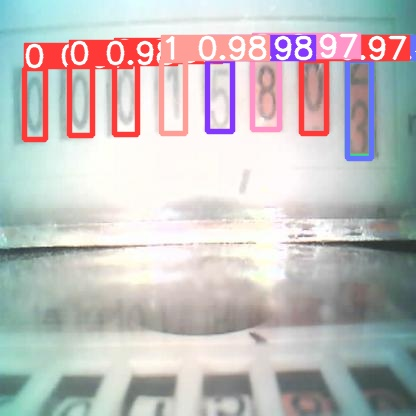

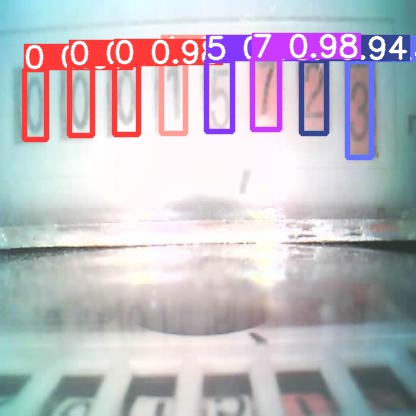

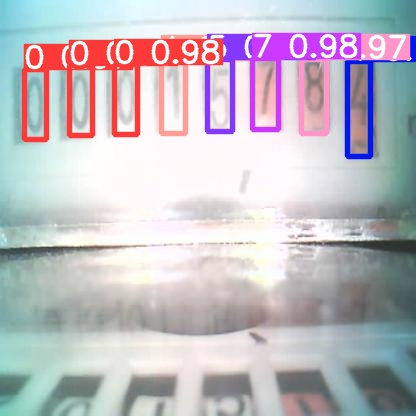

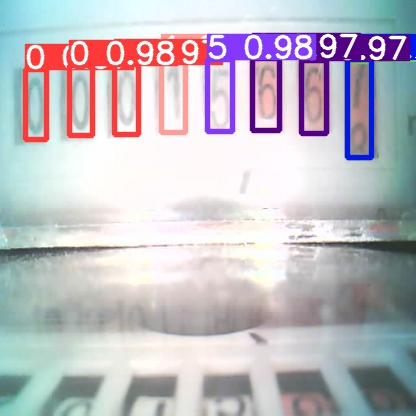

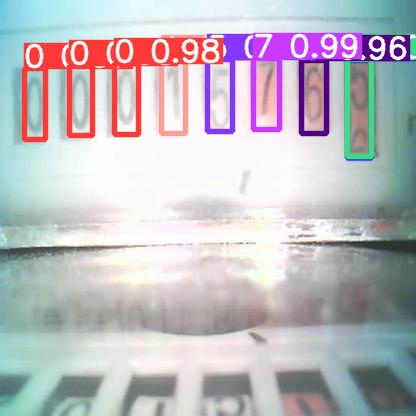

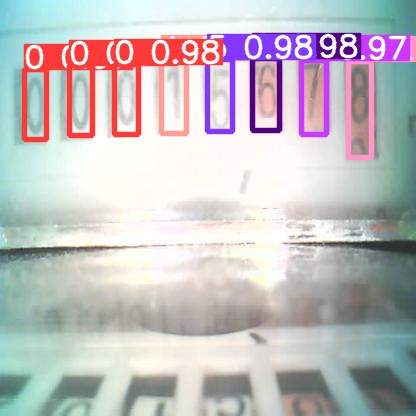

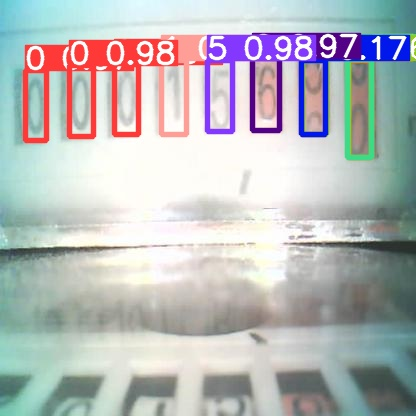

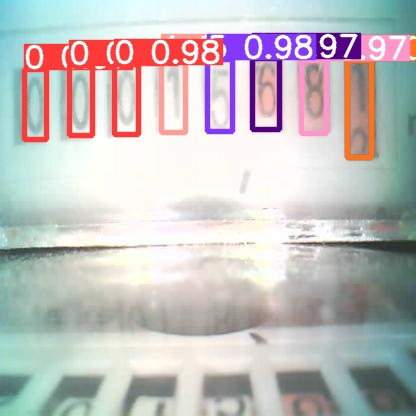

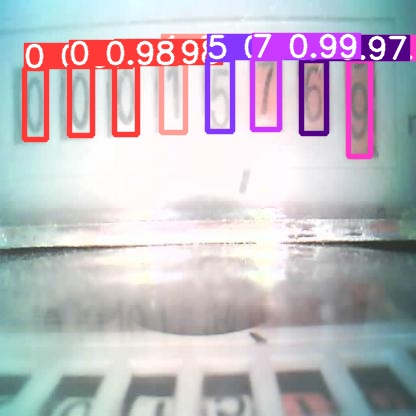

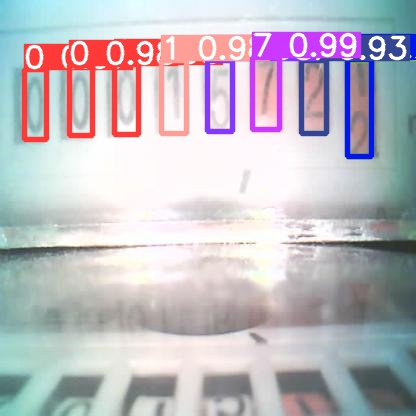

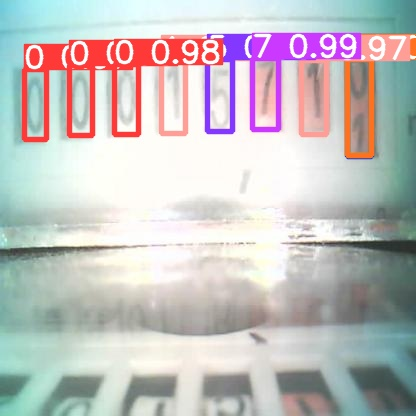

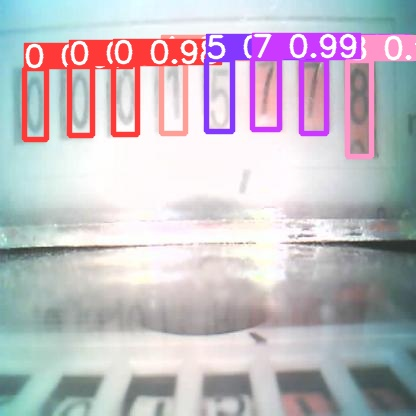

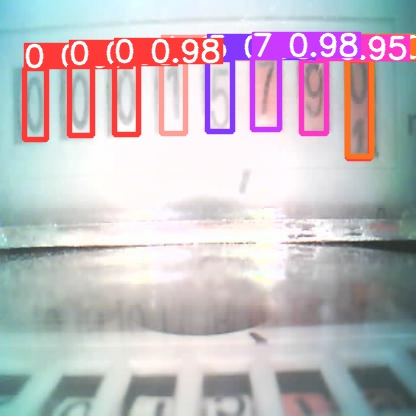

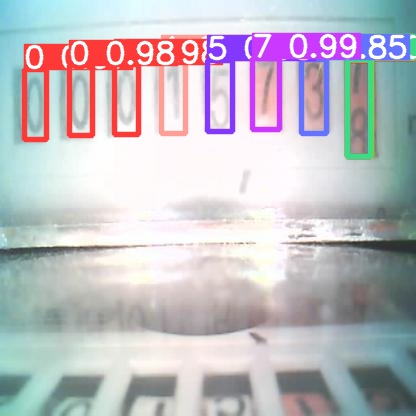

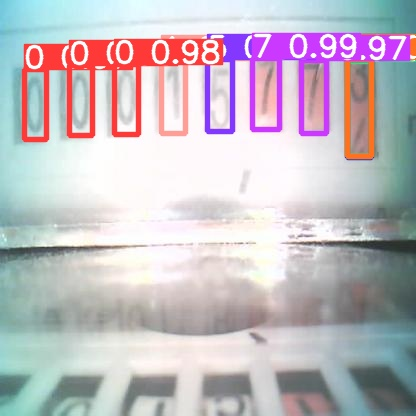

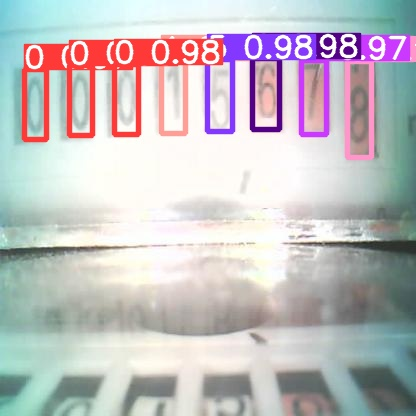

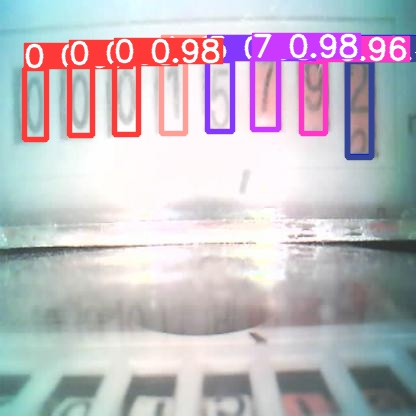

In [ ]:
#display inference on ALL test images
# Dispalay first 7 images
 
import glob
from IPython.display import Image, display
n = 7

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName, width = 800, height = 500))
    print("\n")

    # Display first 7 images, if you want more delete this lines
    n = n - 1
    if n == 0:
      break

## 5. Загрузка полученных весов

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

# **Применение модели**

In [ ]:
# Если среда не была остановлена, то повторной установки не требуется

!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -r requirements.txt # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 9776, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 9776 (delta 0), reused 0 (delta 0), pack-reused 9775
Receiving objects: 100% (9776/9776), 10.04 MiB | 15.39 MiB/s, done.
Resolving deltas: 100% (6801/6801), done.
/content/yolov5
     |████████████████████████████████| 636 kB 12.8 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Требуется:
# 1) Загруить веса модели можно в основной каталог
# 2) Загрузить картинку, к которой хочется применять модель
# 3) Запустить код ниже, а потом сделать restart runtime и еще раз запустить код ниже, 
# тк после первого запуска будут подгружаться какие-то еще нужные пакеты, 
# и чтобы среда нормально отработала нужно ее перезагрузить.

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-13 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 213 layers, 7064065 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 
Saved 1 image to /content/runs/detect/my_result


results 
       xmin     ymin      xmax     ymax  confidence  class name
0  389.250  65.8125  427.2500  149.250    0.979492     17    7
1   38.625  79.1250   68.3125  161.875    0.978516      0    0
2  108.000  74.3750  139.6250  157.250    0.976562      0    0
3  178.500  72.2500  209.2500  155.875    0.975098      0    0
4  320.250  67.3750  356.2500  151.125    0.967285     15    5
5  251.250  68.5000  284.2500  156.125    0.963379      1    1
6  466.000  68.5000  500.5000  153.375    0.898926     12    2


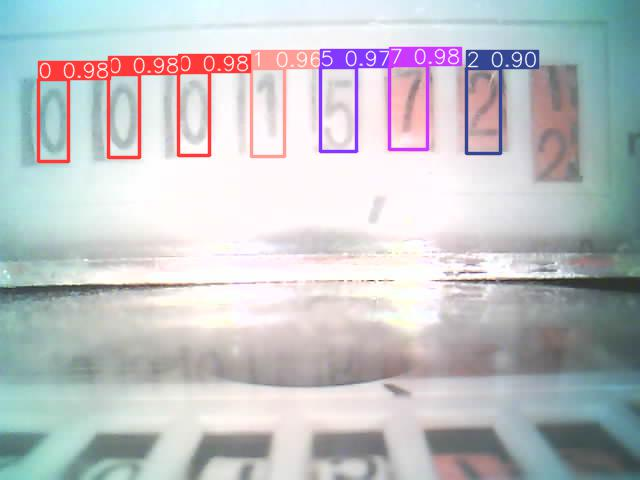

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images


# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/best.pt')  # default

# Image
img = '/content/yolov5/data/images/0378_0_0_0_1_5_7_2_1-5.jpg'

# Save Path
save_dir_results = '/content/runs/detect/my_result'

# Inference
results = model(img)

# Print results
print("results \n", results.pandas().xyxy[0])

# Show results
results.save(save_dir_results)
Image(filename= save_dir_results + '/' + results.files[0], width=600)